In [21]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Input, Flatten, Lambda, Reshape
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import random
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import scipy.stats as stats

In [22]:
(x_train, _), (x_test, _) = mnist.load_data()

batch = 60

train_samples = 10000
test_samples = 1000
#val_samples = int(train_samples * 0.2) 

x_train_list = list(x_train)
x_train_small = random.sample(x_train_list, train_samples)
x_train_small = np.array(x_train_small)

#val_list_small = random.sample(x_train_list, val_samples)
#val_list_small = np.array(val_list_small)

x_test_list = list(x_test)
x_test_small = random.sample(x_test_list, test_samples)
x_test_small = np.array(x_test_small)

x_train_small = x_train_small.astype('float32')
x_test_small = x_test_small.astype('float32')
#val_list_small = val_list_small.astype('float32')

x_train_small = x_train_small / 255
x_test_small = x_test_small / 255
#val_list_small = val_list_small/255

img_width  = x_train_small.shape[1]
img_height = x_train_small.shape[2]
num_channels = 1

x_train_small = np.reshape(x_train_small, (len(x_train_small), img_width, img_height, num_channels))
x_test_small = np.reshape(x_test_small, (len(x_test_small), img_width, img_height, num_channels))
#val_list_small= np.reshape(val_list_small, (len(val_list_small), img_width, img_height, num_channels)) 
img_shape = (img_height, img_width, num_channels)

In [23]:
(x_anomaly_train, _),(x_anomaly_test, _) = tf.keras.datasets.fashion_mnist.load_data()
anomaly_samples = 2000
_
anomaly_list = list(x_anomaly_train)
anomaly_data = random.sample(anomaly_list, anomaly_samples)
anomaly_data = np.array(anomaly_data)

anomaly_data = anomaly_data.astype('float32')
anomaly_data = anomaly_data / 255
anomaly_data = np.reshape(anomaly_data, (len(anomaly_data), img_width, img_height, num_channels))


anomaly_test_list = list(x_anomaly_test)
anomaly_test_data = random.sample(anomaly_test_list, anomaly_samples)
anomaly_test_data = np.array(anomaly_test_data)

anomaly_test_data = anomaly_test_data.astype('float32')
anomaly_test_data = anomaly_test_data / 255
anomaly_test_data = np.reshape(anomaly_test_data, (len(anomaly_test_data), img_width, img_height, num_channels))

In [24]:
print(type(x_train))
print(type(x_train_small))
print(type(anomaly_data))
print(len(x_train))
#print(len(val_list_small))
print(x_train.shape)
print(len(x_test))
print(x_test.shape)
print(len(x_train_small))
print(len(x_test_small))
print(len(anomaly_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
60000
(60000, 28, 28)
10000
(10000, 28, 28)
10000
1000
2000


[2685, 7351, 6932, 2842, 3039, 2832, 4246, 710, 3964, 8518]

Few of the training data samples are:


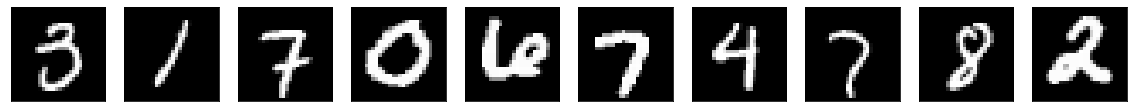

In [25]:
n = []
a = 0
for j in range(0, 10):
    n.append(random.randint(0, train_samples))
print(n)

print('\nFew of the training data samples are:')
plt.figure(figsize=(20, 4))
for i in n:
    a = a + 1
    ax = plt.subplot(2, 10, a)
    plt.imshow(x_train_small[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


[1734, 1945, 1223, 1161, 833, 1605, 1153, 1911, 552, 1810]

Few of the Anomaly data samples are:


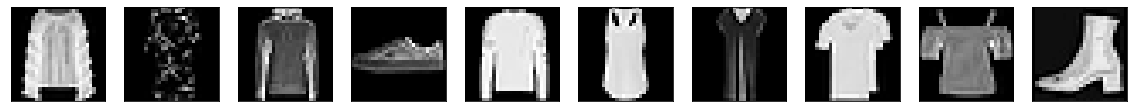

In [26]:
f = []
b = 0
for j in range(0, 10):
    f.append(random.randint(0, len(anomaly_data)-1))
print(f)

print('\nFew of the Anomaly data samples are:')
plt.figure(figsize=(20, 4))
             
for i in f:
    b = b + 1
    ax = plt.subplot(2, 10, b)
    plt.imshow(anomaly_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
input_img = keras.Input(shape = img_shape)

x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])

In [28]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584 

In [29]:
a = autoencoder.fit(x_train_small, x_train_small,
                epochs= 25,
                batch_size=batch,
                shuffle=True,
                validation_data=(x_test_small, x_test_small))

Epoch 1/25
167/167 [==============================] - 10s 50ms/step - loss: 0.3036 - accuracy: 0.8012 - val_loss: 0.1988 - val_accuracy: 0.7852
Epoch 2/25
167/167 [==============================] - 8s 49ms/step - loss: 0.1799 - accuracy: 0.7931 - val_loss: 0.1684 - val_accuracy: 0.7927
Epoch 3/25
167/167 [==============================] - 7s 40ms/step - loss: 0.1599 - accuracy: 0.7986 - val_loss: 0.1534 - val_accuracy: 0.7982
Epoch 4/25
167/167 [==============================] - 7s 41ms/step - loss: 0.1479 - accuracy: 0.8017 - val_loss: 0.1432 - val_accuracy: 0.8012
Epoch 5/25
167/167 [==============================] - 8s 46ms/step - loss: 0.1400 - accuracy: 0.8038 - val_loss: 0.1368 - val_accuracy: 0.8015
Epoch 6/25
167/167 [==============================] - 7s 44ms/step - loss: 0.1344 - accuracy: 0.8053 - val_loss: 0.1322 - val_accuracy: 0.8033
Epoch 7/25
167/167 [==============================] - 8s 46ms/step - loss: 0.1306 - accuracy: 0.8063 - val_loss: 0.1287 - val_accuracy: 0.803

In [30]:
decoded_imgs = autoencoder.predict(x_test_small)
decoded_imgs_anom = autoencoder.predict(anomaly_data)

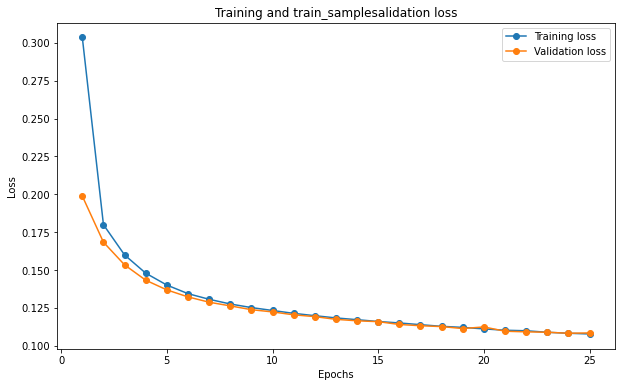

In [31]:
plt.rcParams["figure.figsize"] = (10,6)
loss = a.history['loss']
val_loss = a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-o', label='Training loss')
plt.plot(epochs, val_loss, '-o', label='Validation loss')
plt.title('Training and train_samplesalidation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The orignal images are:


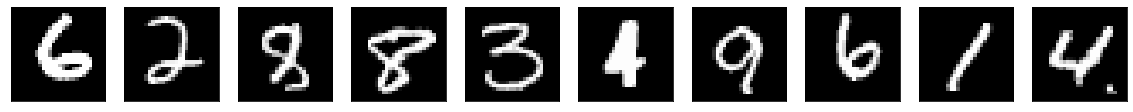


The reconstructed images are:


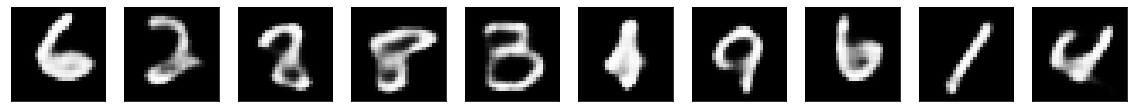

In [32]:
n = 10
plt.figure(figsize=(20, 4))
print("The orignal images are:")
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_small[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("\nThe reconstructed images are:")
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [33]:
recon_error_list=[]

for i in range(1, 100):
    #print(x_test_small[i].shape,decoded_imgs[i].shape)
    reconstruction_error = autoencoder.evaluate([decoded_imgs[i]],[x_test_small[i]])
    recon_error_list.append(reconstruction_error)
recon_error_list = np.array(recon_error_list)  
#print(recon_error_list)

ano_recon_error_list=[]

for i in range(1, 100):
    #print(x_test_small[i].shape,decoded_imgs[i].shape)
    ano_recon_error = autoencoder.evaluate([decoded_imgs_anom[i]],[anomaly_data[i]])
    ano_recon_error_list.append(ano_recon_error)
ano_recon_error_list = np.array(ano_recon_error_list)

def Extract(lst):
    return [item[0] for item in lst]

recon_error_list = Extract(recon_error_list)
ano_recon_error_list = Extract(ano_recon_error_list)

1/1 [==============================] - 0s 43ms/step - loss: 0.6222 - accuracy: 0.5051


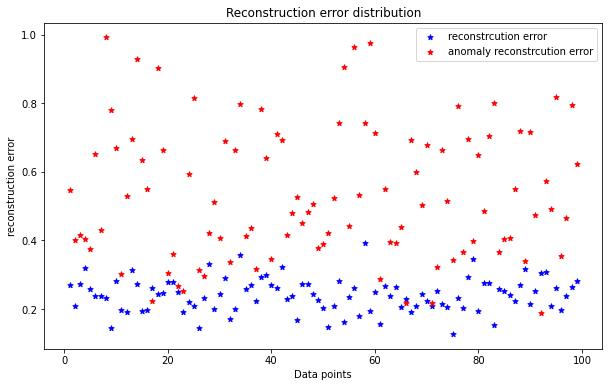

In [34]:
x = list(range(1,len(recon_error_list)+1,1))
y = list(range(1,len(ano_recon_error_list)+1,1))

plt.scatter(x, recon_error_list, label= "reconstrcution error", color= "blue", marker= "*", s=30)
plt.scatter(y, ano_recon_error_list, label= "anomaly reconstrcution error", color= "red", marker= "*", s=30)
plt.xlabel('Data points')
plt.ylabel('reconstruction error')
plt.title('Reconstruction error distribution')
plt.legend()
plt.show()


The distribution of the reconstruction error is:

The mean of the reconstruction error is 0.2408 
The standard deviation of the reconstruction error is 0.0488


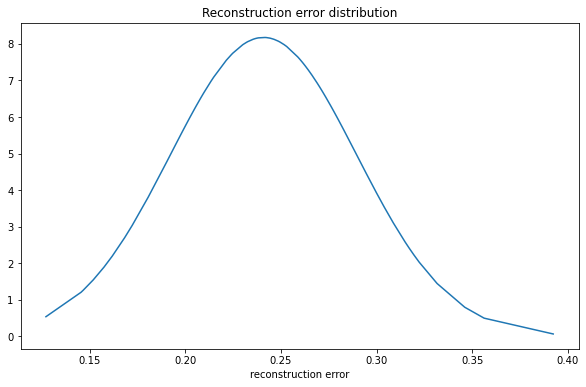

In [35]:
print("The distribution of the reconstruction error is:")

re = recon_error_list
re.sort()
re_mean = np.mean(re)
re_std = np.std(re)

print("\nThe mean of the reconstruction error is",format(re_mean,".4f"),
      "\nThe standard deviation of the reconstruction error is",format(re_std,".4f"))

pdf = stats.norm.pdf(re, re_mean, re_std)
plt.plot(re, pdf)
plt.xlabel('reconstruction error')
plt.title('Reconstruction error distribution')
#plt.xlim(0.3, 0.7)
plt.show()

The threshold values are as follows: 0.3384 , 0.1433

The thresholds can be visualised below:


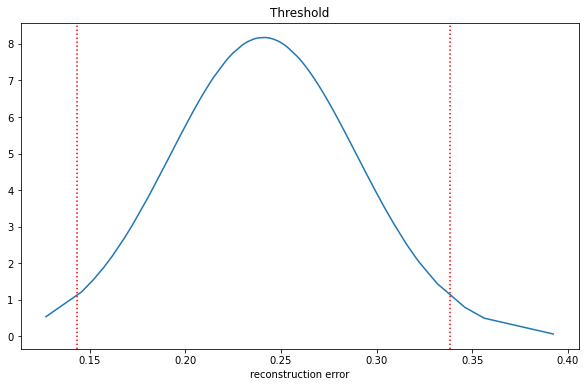

In [36]:
threshold = [re_mean + (2*re_std) ,re_mean - (2*re_std)]
print("The threshold values are as follows:",format(threshold[0],".4f"),",",format(threshold[1],".4f"))

print("\nThe thresholds can be visualised below:")

re = recon_error_list
re.sort()
re_mean = np.mean(re)
re_std = np.std(re)
pdf = stats.norm.pdf(re, re_mean, re_std)
plt.plot(re, pdf)
#plt.plot(threshold[0], 0, marker="o", markersize=10, markerfacecolor="red")
#plt.plot(threshold[1], 0, marker="o", markersize=10, markerfacecolor="red")
plt.axvline(x = threshold[0], color = 'red', linestyle='dotted')
plt.axvline(x = threshold[1], color = 'red', linestyle='dotted')
plt.xlabel('reconstruction error')
plt.title('Threshold')
plt.show()

In [40]:
test  = autoencoder.predict(anomaly_test_data)
anomaly_det= 0
test_data_nos = 500

for i in range(1, test_data_nos):
    test_reconstruction_error = autoencoder.evaluate(test[i],anomaly_data[i])
    if test_reconstruction_error[0] > threshold[0] or test_reconstruction_error[0] < threshold[1]:
        anomaly_det += 1

1/1 [==============================] - 0s 17ms/step - loss: 0.7205 - accuracy: 0.2321


In [41]:
accuracy = anomaly_det/test_data_nos *100
print("Accuracy of the model detecting an anomaly is: ",accuracy)

Accuracy of the model detecting an anomaly is:  96.6


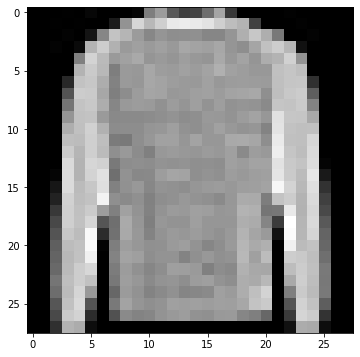

1/1 [==============================] - 0s 16ms/step - loss: 0.8983 - accuracy: 0.2443

The reconstruction error is:  0.8983
Anomaly Detected


In [42]:
test  = autoencoder.predict(anomaly_data)

plt.imshow(anomaly_data[0].reshape(28, 28))
plt.show()

test_reconstruction_error = autoencoder.evaluate(test[0],anomaly_data[0])
print('\nThe reconstruction error is: ',format(test_reconstruction_error[0],'.4f'))

if test_reconstruction_error[0] > threshold[0] or test_reconstruction_error[0] < threshold[1]:
    print("Anomaly Detected")
else:
    print("Data is Pure")